# Detectando pemtagramas
- En este cuaderno intentaremos detectar los pentagramas de las páginas del Capítulo 1.

## Librerías necesarias

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,194 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [2]:
!sudo apt-get install tesseract-ocr-spa

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-spa all 4.00~git24-0e00fe6-1.2 [951 kB]
Fetched 951 kB in 1s (1,235 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-spa.
(Reading databa

In [3]:
pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.6-py2.py3-none-any.whl size=13629 sha256=f500dd78b09f86d01b29c3e7b1a835b6d5caf12fe19029bd9843f1e181e3f8e5
  Stored in directory: /root/.cache/pip/wheels/ee/71/72/b98430261d849ae631e283dfc7ccb456a3fb2ed2205714b63f
Successfully built pytesseract


In [4]:
pip install tesseract

     |████████████████████████████████| 45.6MB 79kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp36-none-any.whl size=45562572 sha256=a43ef504698ad2f47cfee02b3297ba2d89482f04a605471a8c84d55f40f06189
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [5]:
import cv2
import sys
import pytesseract
from pytesseract import Output
import argparse
import pickle
import numpy as np
from matplotlib import pyplot as plt

In [6]:
!unzip Fotos.zip

Archive:  Fotos.zip
  inflating: Fotos/pag1.jpg          
  inflating: Fotos/pag10.jpg         
  inflating: Fotos/pag11.jpg         
  inflating: Fotos/pag12.jpg         
  inflating: Fotos/pag13.jpg         
  inflating: Fotos/pag14.jpg         
  inflating: Fotos/pag15.jpg         
  inflating: Fotos/pag16.jpg         
  inflating: Fotos/pag17.jpg         
  inflating: Fotos/pag18.jpg         
  inflating: Fotos/pag19.jpg         
  inflating: Fotos/pag2.jpg          
  inflating: Fotos/pag20.jpg         
  inflating: Fotos/pag21.jpg         
  inflating: Fotos/pag22.jpg         
  inflating: Fotos/pag23.jpg         
  inflating: Fotos/pag3.jpg          
  inflating: Fotos/pag4.jpg          
  inflating: Fotos/pag5.jpg          
  inflating: Fotos/pag6.jpg          
  inflating: Fotos/pag7.jpg          
  inflating: Fotos/pag8.jpg          
  inflating: Fotos/pag9.jpg          


## Leemos nuestras fotos

In [7]:
path = '/content/Fotos/'

In [8]:
Fotos = []
for i in range(0,23):
  if i%2 == 0:
    pag = cv2.imread(path + 'pag' + str(i+1) + '.jpg')
    pag = cv2.cvtColor(pag, cv2.COLOR_BGR2RGB)
    pag = pag[:1825,175:1375]
    Fotos.append(pag)
  if i%2 == 1:
    pag = cv2.imread(path + 'pag' + str(i+1) + '.jpg')
    pag = cv2.cvtColor(pag, cv2.COLOR_BGR2RGB)
    pag = pag[198:,:1200]
    Fotos.append(pag)

## Intentando detectar los pentagramas

In [49]:
def pentagramas(foto):
  foto2 = foto.copy()
  (H,W) = foto.shape[:2]
  gray = cv2.cvtColor(foto,cv2.COLOR_RGB2GRAY)
  (T,threshInv) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  tthreshInv = cv2.resize(threshInv,(int(W*25/100),int(H*25/100)))
  dilate = cv2.dilate(threshInv.copy(),(15,1))
  
  for i in range(0,4):
    dilate = cv2.dilate(dilate,(15,1))

  cnts,_ = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for c in cnts:
    area = cv2.contourArea(c)
    if(area > 10000):
      cv2.drawContours(foto2, [c], -1, (119, 90, 17), 2)
  return foto2

In [50]:
contornos = [pentagramas(Fotos[i]) for i in range(0,23)]

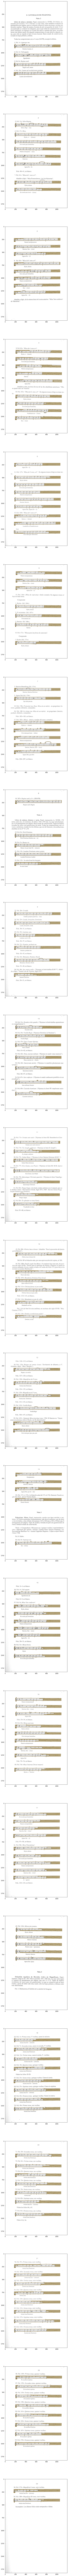

In [51]:
fig, ax = plt.subplots(23,1,figsize=(23*16,23*16))
for i in range(0,23):
  ax[i].imshow(contornos[i])
plt.show()

## Intentando el rectángulo que contiene a el contorno

In [67]:
def pentagramas2(foto):
  foto2 = foto.copy()
  (H,W) = foto.shape[:2]
  gray = cv2.cvtColor(foto,cv2.COLOR_RGB2GRAY)
  (T,threshInv) = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
  tthreshInv = cv2.resize(threshInv,(int(W*25/100),int(H*25/100)))
  dilate = cv2.dilate(threshInv.copy(),(15,1))
  
  for i in range(0,4):
    dilate = cv2.dilate(dilate,(15,1))

  cnts,_ = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  for c in cnts:
    area = cv2.contourArea(c)
    if(area > 10000):
      (x, y, w, h) = cv2.boundingRect(c)
      cv2.rectangle(foto2, (x, y), (x + w, y + h), (119, 90, 17), 2)
  return foto2

In [68]:
contornos = [pentagramas2(Fotos[i]) for i in range(0,23)]

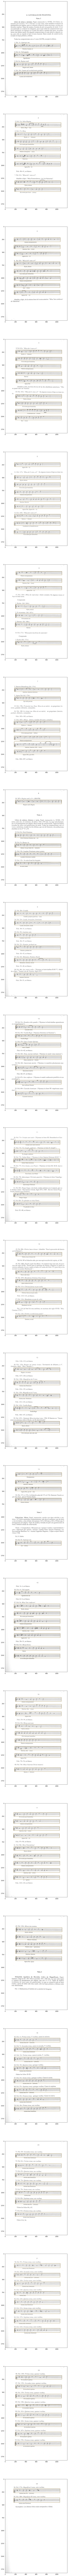

In [69]:
fig, ax = plt.subplots(23,1,figsize=(23*16,23*16))
for i in range(0,23):
  ax[i].imshow(contornos[i])
plt.show()